<a href="https://colab.research.google.com/github/j23-cs167/project-2-Tyler-Goebel/blob/main/Project2_Goebel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Tyler Goebel
Proposed Points (out of 25): 25

I went for full points. I double checked to be sure I did what was asked in all 5 sections. 

The only doubt I have is with the research and analysis. Needing to restart my project on Friday did not help timewise. It was hard to allocate huge portions of time towards the project to be in depth with the research. Because of that, maybe 1 point could be taken off in research and analysis, but I think I made enough models and analyzed them to where I can get full points.

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I want to predict the chance that a student is admitted into grad school based off of descriptors. 

The data includes University ranking (out of 5), TOEFL score, GRE score, strength or statement of purpose and letter of recommendation (out of 5), undergrad Gpa (0 to 10), whether or not they did research (0 or 1), and the chance of admission

Data is from the links from Project 1



# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

I just needed to set up my target and predictor variables, and then split the data. There was no missing data, and I did not normalize the data until later in the research section.

In [1]:
# load and prepare your data here
from google.colab import drive
import pandas
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
path = ('/content/drive/MyDrive/CS167/datasets/admission_data.csv')

data = pandas.read_csv(path)
data.head()

data.isna().any()   #no missing values

target = 'Chance of Admit'
predictors = data.columns.drop(['Chance of Admit', 'Serial No.'])
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#train_data.head()
#test_data.head()
#train_sln.head()
#test_sln.head()



Mounted at /content/drive


# 3. Research

Put your code and your experiments here

The plan is to create a few different models and see which model makes the best predictions according to the metrics (MAE, MSE, and r-squared)

In [2]:
#baseline model with Dummy
from sklearn.dummy import DummyRegressor
from sklearn import metrics
dummy_regr = DummyRegressor()
dummy_regr.fit(train_data, train_sln)
preds = dummy_regr.predict(test_data)
print("Metrics")
print('MAE: ', metrics.mean_absolute_error(test_sln, preds))
print('MSE: ', metrics.mean_squared_error(test_sln, preds))
print('R2: ', metrics.r2_score(test_sln, preds))
print("Prediction  \t\t  Actual")
for i in range(10):
  print(preds[i],"\t\t", test_sln.iloc[i])

# Don't use this. Ever. The error values are actually not too bad, but a negative r-squared is awful, simple as that.

Metrics
MAE:  0.11175000000000002
MSE:  0.018368703125000004
R2:  -0.0014319593565470523
Prediction  		  Actual
0.725375 		 0.79
0.725375 		 0.83
0.725375 		 0.94
0.725375 		 0.9
0.725375 		 0.82
0.725375 		 0.7
0.725375 		 0.79
0.725375 		 0.79
0.725375 		 0.76
0.725375 		 0.93


In [3]:
from sklearn import neighbors
#Base knn model
neigh = neighbors.KNeighborsRegressor()
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))


MSE:  0.0049572999999999996
MAE:  0.05279999999999999
r2:  0.7297360288129644


In [4]:
#Let's see if it works better with a weighted knn model
from sklearn import neighbors
neigh2 = neighbors.KNeighborsRegressor(weights = 'distance')
neigh2.fit(train_data, train_sln)
predictions2 = neigh2.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions2))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions2))
print('r2: ', metrics.r2_score(test_sln, predictions2))

#slightly better in each category

MSE:  0.0047092513329383984
MAE:  0.05116401289897832
r2:  0.7432592406031968


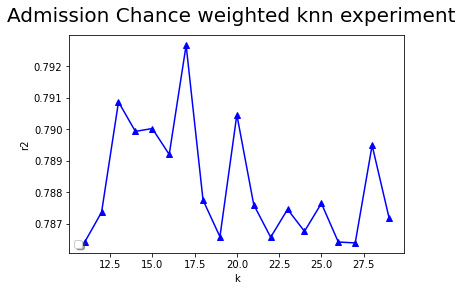

In [12]:
#Let's tune k in our weighted knn model to optimize it
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn import neighbors

k_vals = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

knn_r2 = []

for k in k_vals:
  neigh = neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance')
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)
  current_r2 = metrics.r2_score(test_sln,predictions)
  knn_r2.append(current_r2)

plt.suptitle('Admission Chance weighted knn experiment',fontsize=20)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(k_vals,knn_r2,'b^-')
plt.legend(loc='lower left', shadow=True)

# Using k-values from 10 to 200, intervals of 10, Graph peaked at k-value of 20, so this next graph will show all k-values between 10 and 30 to find optimal k


# k=17 results in best r-squared for the weighted knn model

In [6]:
#Create a decision tree regressor as a predictive model, then visualize a smaller version of the tree
from sklearn import tree
print("Normalized Decision Tree")
dt = tree.DecisionTreeRegressor()
dt.fit(train_data, train_sln)
dt_predictions = dt.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, dt_predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, dt_predictions))
print('r2: ', metrics.r2_score(test_sln, dt_predictions))

#not as good as knn or weighted knn models

Normalized Decision Tree
MSE:  0.00632375
MAE:  0.057374999999999995
r2:  0.6552393868045072


r2:  0.6654817298549686
Note: r-squared value changed because max_depth parameter was implemented


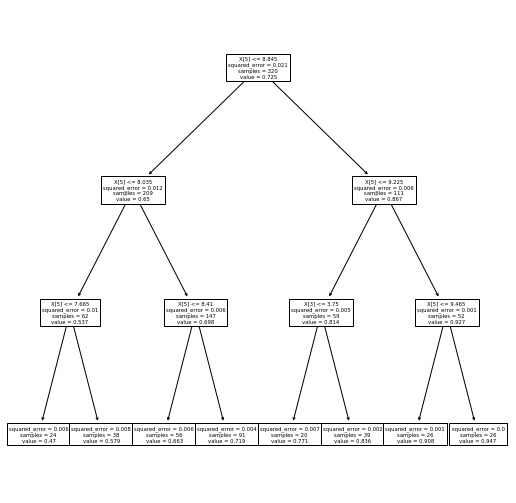

In [10]:
# Here is what the decision tree looks like (using a max depth of 3 so it isn't overwhelming for my computer)
small_dt = tree.DecisionTreeRegressor(max_depth = 3)
small_dt.fit(train_data, train_sln)
small_dt_predictions = small_dt.predict(test_data)
print('r2: ', metrics.r2_score(test_sln, small_dt_predictions))

import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
tree.plot_tree(small_dt);

print("Note: r-squared value changed because max_depth parameter was implemented")

#Surprised the r-squared actually went up. I also did max_depth = 4 and that r-squared value was lower than the original decision tree r-squared.

In [11]:
#Let's make an MLP
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(train_data,train_sln)
mlp_predictions = mlp.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, mlp_predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, mlp_predictions))
print('r2: ', metrics.r2_score(test_sln, mlp_predictions))

#Not all that different from the decision tree model

MSE:  0.006120654345270863
MAE:  0.06070842549478902
r2:  0.6663118331317273


In [17]:
#Lastly, a random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_data, train_sln)
rf_predictions = rf.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, rf_predictions))
print('MAE: ', metrics.mean_absolute_error(test_sln, rf_predictions))
print('r2: ', metrics.r2_score(test_sln, rf_predictions))

# I thought the random forest would be the best, that's why I did it last. 

MSE:  0.005253526624999993
MAE:  0.05415625000000004
r2:  0.7135862327457845


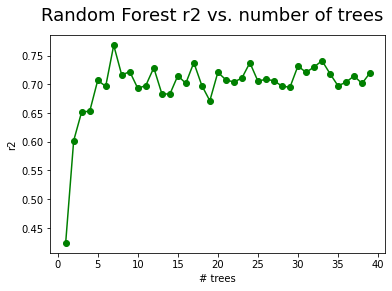

<Figure size 1800x1800 with 0 Axes>

In [22]:
#Let's tune the number of trees in our random forest and see if our model can improve
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_r2 = []

    for n in n_estimator_values:

        curr_rf = RandomForestRegressor(n_estimators = n)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_r2 = metrics.r2_score(test_sln,curr_predictions)
        rf_r2.append(curr_r2)


    plt.suptitle('Random Forest r2 vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('r2')
    plt.plot(n_estimator_values,rf_r2,'go-')
    plt.figure(figsize=(25,25))

    plt.show()
    
tune_number_of_trees(range(1,40))

#For this tuning, 7 trees is the best for the random forest model. 

#Note: This graph is different every time I run the cell because random forests are random. The ideal number of trees will be different next time I try to tune it


In [23]:
#Now, I will normalize the data and re-run a new weighted knn and random forest model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [24]:
#Weighted knn model with normalized data
from sklearn import neighbors
neigh3 = neighbors.KNeighborsRegressor(weights = 'distance')
neigh3.fit(train_data_normalized, train_sln)
predictions3 = neigh3.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions3))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions3))
print('r2: ', metrics.r2_score(test_sln, predictions3))

#After normalizing the data, the weighted knn model improved slightly. (.015 r-squared increase)

MSE:  0.004429921113951012
MAE:  0.04982767027496007
r2:  0.7584878719662524


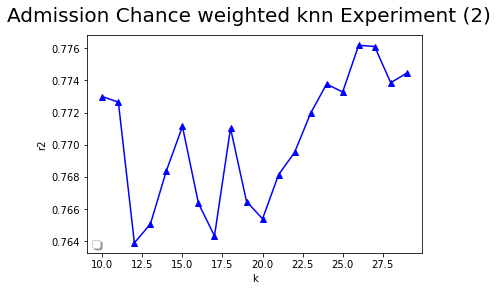

In [25]:
#Tune the weighted knn model again to find the best metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn import neighbors

k_vals = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

knn_r2 = []

for k in k_vals:
  neigh = neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance')
  neigh.fit(train_data_normalized, train_sln)
  predictions = neigh.predict(test_data_normalized)
  current_r2 = metrics.r2_score(test_sln,predictions)
  knn_r2.append(current_r2)

plt.suptitle('Admission Chance weighted knn Experiment (2)',fontsize=20)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(k_vals,knn_r2,'b^-')
plt.legend(loc='lower left', shadow=True)

#Our weighted knn model with normalized data using a k value of 26 provides the best r-squared. It is only slightly better than using the base model though.

In [26]:
rf2 = RandomForestRegressor()
rf2.fit(train_data_normalized, train_sln)
rf_predictions2 = rf2.predict(test_data_normalized)

print('MSE: ', metrics.mean_squared_error(test_sln, rf_predictions2))
print('MAE: ', metrics.mean_absolute_error(test_sln, rf_predictions2))
print('r2: ', metrics.r2_score(test_sln, rf_predictions2))

# Again only slightly improved the random forest model with normalized data

MSE:  0.0051069144999999995
MAE:  0.053625000000000055
r2:  0.7215792884669772


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

1. The weighted knn model performed the best. If my logic is correct here, I think the weighted knn model performed well because the nearest neighbors would likely have similar acceptance rates. The closest points on a nearest neighbors graph would have similar scores, letter strengths, and gpa's. Acceptance to Universities have lots to do with those exact requirements, therefore predicting acceptance based on similar scores would make the predicitions pretty accurate. I hope I was able to capture all og my thinking with that. 
2. With what we have done in class before, I was surprised that the random forest did not have the best metrics. For the first project, assignments, and in-class exercises, the random forest almost seemed to provide the best predictions. Then, the MLP and decision tree were the worst performing models. I say worst, but the were not far worse than the other models, they were just not quite as good at predicting. 
3. Another surprise was that normalizing the data did not affect the models that much. There may have been larger increases in the knn and decision tree if I had tested those models with normalized data.
4. There is some differences in the data (differences in numbers, hundreds and single digits), but the normalized data did not improve the models too much. I think since the numbers aren't too big, that not normalizing the data is okay for this project.
5. For a recommendation, tuning more parameters in the models with normalized data would be helpful. This would allow for predictions to be the most accurate/have the least error.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

These models all went pretty smoothly. My challenges were with my first dataset I tried using. I had a dataset from kaggle and tried predicting the price of used cars. The data in the excel sheet was listed weird in some way. not sure what. I tried cleaning the data in both colab and the excel sheet (with your help Professor Moore), but it just didn't want to work. I ended up choosing a different dataset and restaring. I may have went deeper with tuning some of the models if I had more time to work on the project, but after restarting, it was hard to go super in depth.